# PHAS0007 Computing Unit 4: Fitting a straight line to data

Authors: Ben Waugh, Louise Dash, Becky Chislett

Last updated 2025-10-17

## Learning objectives

By the end of this session, you should be able to:
- use Python to fit a straight line to a set of data;
- present data, calculations and discussion in a well formatted computational notebook.

## Introduction

In this unit we will fit a straight line to a set of data, as outlined in the Data Analysis and Statistics (DAS) lectures and booklet. In this week's assignment you will apply these techniques to some data from an experiment, and present your calculation and results, as well as the data itself, in a Jupyter notebook. You should refer to the materials from the DAS course for explanation of the theory of linear regression, and of how to choose the appropriate level of precision to use in quoting numerical results.

Before we get to linear regresssion, though, we will show you how to format numbers when printing them in Python, so that you can control the precision and layout.

## Formatting numbers

### Presenting numbers

You may have noticed that when you print a value in Python, you often get a lot more decimal places than you really want or need. This can make the output hard to read, and it doesn't follow the rules you have learned in the DAS course for presenting data.

In [29]:
# Value and error
x  = 1/13
dx = x*0.035

# Print results
print(f"x = {x} +/- {dx}")

x = 0.07692307692307693 +/- 0.0026923076923076926


Due to the way the computer represents real numbers you have also seen that the result of a calculation is not always exactly what you might expect.

In [30]:
# Simple arithmetic
print(f"result = {0.1*3}")

result = 0.30000000000000004


Remember, when dealing with data you should quote all uncertainties in your results to one significant figure (usually) or at most two (often appropriate if the first significant figure is 1, or if the uncertainty is an important part of the analysis), and then give your measured or calculated value to the same precision.

However, if you want to do further calculations with your results, you should always use the numbers at their full calculated precision. Hence the best general rule is to **_quote_ your results to 1 or 2 significant figures in the uncertainty, but always _calculate_ with the full number** to minimize rounding errors. So we want to change the format used to print the number, but not round the value stored in the computer's memory.

In any case, you will need to view your results to full precision at some point in order to determine how many significant figures are required. If, for example, you've calculated your least-squares fit line to have a slope of $3.1234567 \pm 0.0043543$, you should quote the result as $3.123 \pm 0.004$ (not forgetting appropriate units, of course!)

Remember though, you can't use LaTeX-style formatting in a Python `print()` statement. If you are able to insert the `±` (plus-minus) symbol, then you can do so, but it is fine to use `+/-`, as well as `^` for superscripts and so on.

### Format specifiers

The way we determine the way a number is printed is to use a **format specifier**.

In [22]:
# Print results to appropriate precision
print(f"x = {x:.3f} +/- {dx:.3f}")

x = 0.077 +/- 0.003


- The `f` before the string marks it as an **f-string** (technically a "formatted string literal", meaning it contains expressions in curly brackets `{}` that should be replaced when the code is run.
- The variable names within the curly brackets are replaced by the values of the corresponding variables.
- The colon `:` marks what follows as a **format specifier**, which tells Python how to present the corresponding value.
- The format specifier (`0.3f` in this case) has four parts:-
  - The first (`0`) is the (minimum) **field width**. Here we use 0 because we don't want any extra space. In fact we could simply omit the number in this case and write `{x:.3f}`.
  - The second (`.`) is just a separator between the width and the next field.
  - The third (`3`) is the **precision**, in this case the number of decimal places to print.
  - The fourth (`f`) is the **type**: `f` means "fixed point", meaning we want a decimal number with a set number of digits following the decimal point.
  
We can use change the minimum field width to a non-zero number if we want to align numbers in a column by padding each value with extra space.

In [33]:
print("Not lined up:")
print(f"  x   = {x:.3f}")    # width=0 so can be omitted
print(f"  10x = {10*x:.3f}")

print("Lined up:")
print(f"  x   = {x:8.3f}")
print(f"  10x = {10*x:8.3f}")

Not lined up:
  x   = 0.077
  10x = 0.769
Lined up:
  x   =    0.077
  10x =    0.769


On other occasions we might want to use `e`, for exponential (scientific) format.

In [24]:
print(f"x = {x:e}")
print(f"x = {x:.3e}")
print(f"x = {x:12.3e}")

x = 7.692308e-02
x = 7.692e-02
x =    7.692e-02


For integers, we don't have the problem of large numbers of unwanted decimal places, so the default format is often what we want, and we can often leave out the format specifier.

In [25]:
n = 23
print(f"n = {n}")

n = 23


If we want to pad the numbers with extra space to line them up, we can use the `d` (decimal) format and specify a minimum width.

In [26]:
n = 23
print(f"n    = {n:4d}")
print(f"10 n = {10*n:4d}")

n    =   23
10 n =  230


Here are a few more examples to illustrate some of the options:-

In [27]:
num_3 = 146.23
num_4 = 42
num_5 = 3.6589543805434e-8

print(f"num_3 to 4dp is {num_3:0.4f} (extra zeros added automatically).")
print(f"  or rounded to the nearest integer value (0dp) it is {num_3:0.0f}.")
print(f"num_4 really is an integer: {num_4:d}.")
print(f"num_5 is best in exponential format: {num_5:e}.")
print(f"  but we might want to limit the number of dp: {num_5:0.2e}.")
print(f"We can put num_5 in f format {num_5:0.10f}")
print(f"  but you need enough digits otherwise you just get {num_5:0.6f}.")

num_3 to 4dp is 146.2300 (extra zeros added automatically).
  or rounded to the nearest integer value (0dp) it is 146.
num_4 really is an integer: 42.
num_5 is best in exponential format: 3.658954e-08.
  but we might want to limit the number of dp: 3.66e-08.
We can put num_5 in f format 0.0000000366
  but you need enough digits otherwise you just get 0.000000.


Many other options are described in the [Python string documentation](https://docs.python.org/3/library/string.html#formatstrings).

## Linear regression using NumPy

### Fitting a straight line using NumPy

The notebook [PHAS0007-DAS Maths of linear regression](https://moodle.ucl.ac.uk/mod/resource/view.php?id=8156703) linked from the [Resources page of the DAS course](https://moodle.ucl.ac.uk/course/view.php?id=55114&section=3#tabs-tree-start) demonstrates how to carry out a straight-line fit by implementing the equations derived in the Data Analysis Booklet. In this unit we will instead use the NumPy library to perform these calculations. In these notes we will provide only a short overview of the procedure. The separate notebook [Fitting a Function to Data](https://moodle.ucl.ac.uk/mod/resource/view.php?id=8062161) goes into more detail, and goes beyond the content of this course, with worked examples to illustrate fitting a straight line and other functions to a set of data.

As usual we start by importing the packages we will need:-

In [28]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

Then we can read in the data, which in this case was generated using a simple artifical simulation.

In [ ]:
# Fields are x, y, (error on y). No physical meaning or units!
x, y, dy = np.loadtxt('unit4data.csv',delimiter=',',unpack=True)

### Weighted fit

Let's start with a weighted fit, which takes the errors on the data into account, giving more importance to the points that are known to be more precise. We use the `polyfit` function as follows. Note that the parameters (`w` and `cov`) needed to take the errors into account correctly are not obvious, so study this code carefully! Normally we would not recommend using code comments to explain how a library function works, but in this case it is likely to be useful to the reader.

In [ ]:
# Fit straight line parameters and calculate errors
degree = 1            # Straight line = polynomial of degree 1.
#   Note: to correctly take errors into account,
#     - set weights with w=1/error
#     - use cov='unscaled'
#   See https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
coeffs, errors = np.polyfit(x,y,degree,w=1/dy,cov='unscaled')
m, c = coeffs                     # unpack gradient and intercept from output
dm, dc = np.sqrt(np.diag(errors)) # errors are sqrt of diagonal terms

# Present results with errors
print(f"m = {m} +- {dm}")
print(f"c = {c} +- {dc}")

m = 2.2220734250223937 +- 0.17308834688749694
c = 0.2496214096579723 +- 0.07904816326003994


Once we know how large the errors on each parameter is, we can choose an appropriate precision to present our results. In this case we the choice of one significant figure for the error on $c$ is fairly clear. For $m$ we could also choose one significant figure, but this would be a less good approximation of the actual error, so here we have chosen two. Note that we consider the precision of each parameter separately: the fact that we give both to two decimal places in this case is a coincidence.

In [ ]:
# Present results with errors
print(f"m = {m:.2f} +- {dm:.2f}")
print(f"c = {c:.2f} +- {dc:.2f}")

m = 2.22 +- 0.17
c = 0.25 +- 0.08


Using these results, we can plot the data along with our line of best fit.

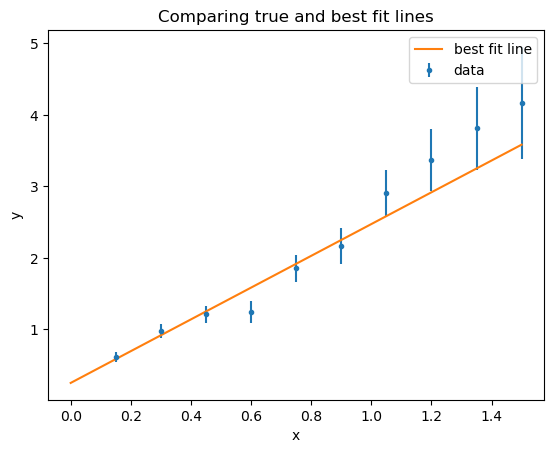

In [ ]:
# Calculate coordinates to plot best fit line
xline = np.array([0,1.5])
yline_fit  = m * xline + c

# Set up graph
plt.figure()
plt.title("Comparing true and best fit lines")
plt.xlabel("x")
plt.ylabel("y")

# Plot data and lines
plt.errorbar(x,y,yerr=dy,fmt='.',label="data")
plt.plot(xline,yline_fit,'-',label='best fit line')
plt.legend();

Does this look like a good fit to the data?

### An unweighted fit

What happens if we don't use the errors, and carry out an unweighted fit?

In [ ]:
# Fit straight line parameters and calculate errors (unweighted)
coeffs_uw, errors_uw = np.polyfit(x,y,degree,cov=True) # NB use cov=True for unweighted fit
m_uw, c_uw = coeffs_uw                     # unpack gradient and intercept from output
dm_uw, dc_uw = np.sqrt(np.diag(errors_uw)) # errors are sqrt of diagonal terms

# Present results with errors
print(f"m = {m_uw:5.2f} +- {dm_uw:4.2f}")
print(f"c = {c_uw:5.2f} +- {dc_uw:4.2f}")

m =  2.74 +- 0.16
c = -0.03 +- 0.15


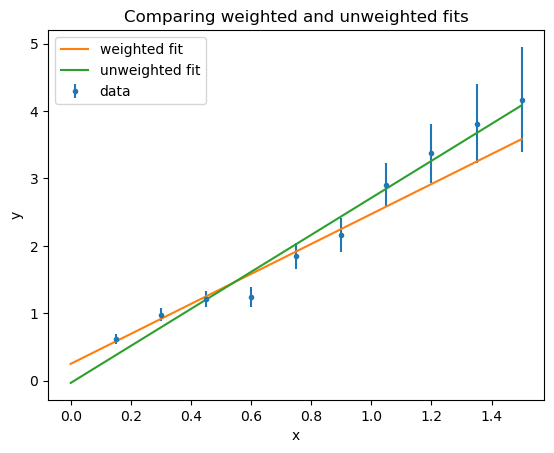

In [ ]:
# Calculate coordinates to plot unweighted fit
yline_uw  = m_uw * xline + c_uw

# Set up graph
plt.figure()
plt.title("Comparing weighted and unweighted fits")
plt.xlabel("x")
plt.ylabel("y")

# Plot data and lines
plt.errorbar(x,y,yerr=dy,fmt='.',label="data")
plt.plot(xline,yline_fit,'-',label='weighted fit')
plt.plot(xline,yline_uw,'-',label='unweighted fit')
plt.legend();

You should give some thought to the question of why there is such a big difference, and whether it is better to rely on the results of the weighted or unweighted fit. You might want to refer to the data analysis booklet.

In this artificial example we can tell you that the actual gradient and intercept used to generate the data were 2.1 and 0.3 respectively. How do these compare with the parameters and errors obtained from the two fits? With real data we do not have the true parameters to compare, so we cannot choose our approach based on which gets closer to the right answer. However, we can use examples like this to gain insight into how regression works, and what difference the errors on the data make to the results.

### Goodness of fit

To ascertain whether our data is actually well described by the straight line we have fitted to it, we can take various approaches, as described in more detail in the DAS booklet:

- look at the graph with the line and the points with error bars;
- plot the residuals (or normalised residuals);
- calculate the $r^2$ statistic;
- calculate the normalised $\chi^2$ statistic.

How well do you think the data above is described by a straight line?

## Adding the parameters to your plot

When you do your own least squares fit line, you're going to want to output the slope and intercept (together with their uncertainties) either as text output with a print statement, like above, or on the plot itself.

To add text to your plot, you can use the function `plt.text`. You will need to work out roughly the x- and y- coordinates where you want the text to start. Then you may need to adjust them to get them exactly right, making sure the text isn't obscuring anything on the plot.

In [ ]:
# Set up graph
plt.figure()
plt.title("Results of simulated experiment")
plt.xlabel("x")
plt.ylabel("y")

# Plot data and lines
plt.errorbar(x,y,yerr=dy,fmt='.',label="data")
plt.plot(xline,yline_fit,'-',label='best fit line: $y=mx+c$')
plt.legend(loc="upper left")

# Add parameters to plot
plt.text(0.8, 4.8,f"m = {m:.2f} +- {dm:.2f}")
plt.text(0.8, 4.55,f"c = {c:.2f} +- {dc:.2f}")

NameError: name 'plt' is not defined